/opt/anaconda3/envs/pytorch_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/pytorch_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1254: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/pytorch_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/an

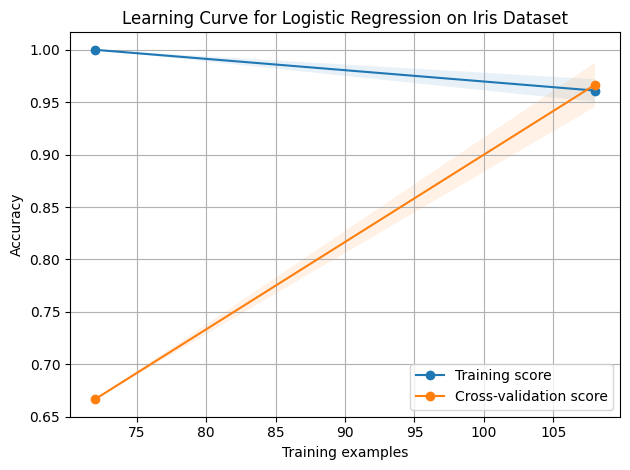

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
# train_size_abs, train_scores, test_scores = learning_curve(
#     model, X, y, train_sizes=[0.3, 0.6, 0.9]
# )

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, train_sizes=[0.3, 0.6, 0.9]
)

# for train_size, cv_train_scores, cv_test_scores in zip(
#     train_size_abs, train_scores, test_scores
# ):
#     print(f"{train_size} samples were used to train the model")
#     print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
#     print(f"The average test accuracy is {cv_test_scores.mean():.2f}")


train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# 绘图
plt.figure()
plt.title("Learning Curve for Logistic Regression on Iris Dataset")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.grid()

# 填充标准差区域
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)

# 绘制训练集和验证集得分曲线
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")

plt.legend(loc="best")
plt.tight_layout()
plt.show()